In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

In [96]:
#Downloadable path
#https://drive.google.com/uc?id=1837VRDmRvDa43w_XnzTdY9bofWWg4k-P&export=download

df=pd.read_csv('Telco_customer_churn.csv')
df.shape

(7043, 33)

In [104]:
from train import clean_data

In [105]:
x,y=clean_data(df)

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Value, Length: 7043, dtype: int64

In [3]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

### 1 Basic Stats for Continious features

In [4]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


### 2 Getting unique values & datatypes for every column

In [5]:
col = []
d_type = []
uniques = []
n_uniques = []
dtype=[]
for i in df.columns:
    col.append(i)
    d_type.append(df[i].dtypes)
    uniques.append(df[i].unique()[:5])
    n_uniques.append(df[i].nunique())
    #dtype.append(df[i].dtype)
    

report=pd.DataFrame({'Column': col, 'd_type': d_type, 'unique_values': uniques ,'n_uniques': n_uniques})

report

,Column,d_type,unique_values,n_uniques
0,CustomerID,object,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOK...",7043
1,Count,int64,[1],1
2,Country,object,[United States],1
3,State,object,[California],1
4,City,object,"[Los Angeles, Beverly Hills, Huntington Park, ...",1129
5,Zip Code,int64,"[90003, 90005, 90006, 90010, 90015]",1652
6,Lat Long,object,"[33.964131, -118.272783, 34.059281, -118.30742...",1652
7,Latitude,float64,"[33.964131, 34.059281, 34.048013, 34.062125, 3...",1652
8,Longitude,float64,"[-118.272783, -118.30742, -118.293953, -118.31...",1651
9,Gender,object,"[Male, Female]",2


**Inference** :
- From the above table we are dropping these columns because they dont any value to the task at hand or there is only 1 unique value present in the column.
    - CustomerID
    - Count
    - Country
    - State
    - LatLong
    - Latitude
    - Longitude
- Total charges happens to be of object datatype but it must be converted to numerical data type

In [6]:
df.drop(['CustomerID' ,'Count' ,'Country' ,'State' ,'Lat Long' ,'Latitude' ,'Longitude'], axis=1, inplace=True)
df['Total Charges']=pd.to_numeric(df['Total Charges'], errors='coerce')

### 3 Null value analysis 

In [7]:
df.isna().sum()

City                    0
Zip Code                0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

**Inference**:
- Total charges and churn reason columns have missing values. We replace that by median.
  

In [8]:
df['Total Charges'].fillna(df['Total Charges'].median(),inplace=True)

### 4 EDA

#### 4.1 Find percentage of churn label (which happens to be target value) 

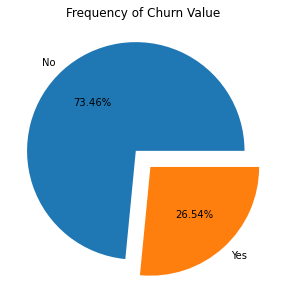

In [9]:
plt.figure(figsize=(10,5))
plt.pie(df['Churn Label'].value_counts(), labels=df['Churn Label'].value_counts().keys().to_list(), autopct='%.2f%%',explode=[0.1,0.1])
plt.title('Frequency of Churn Value')
plt.show()

**Inference**:
- Around 75 % are not churning and close to 26% of the customers churn.
- The dataset is a imbalanced. 

#### 4.2 Gender vs Churn

In [10]:
df.groupby('Churn Label')['Gender'].value_counts(normalize=True).to_frame().rename(columns={'Gender': 'Perc'}).reset_index().sort_values('Churn Label')

,Churn Label,Gender,Perc
0,No,Male,0.507344
1,No,Female,0.492656
2,Yes,Female,0.502408
3,Yes,Male,0.497592


**Inference**:
- The distribution across the churn label happens to be approximately equal   

#### 4.3 Senior Citizen vs Churn

In [11]:
df.groupby('Churn Label')['Senior Citizen'].value_counts(normalize=True).to_frame().rename(columns={'Senior Citizen': 'Perc'}).reset_index().sort_values('Churn Label')

,Churn Label,Senior Citizen,Perc
0,No,No,0.871279
1,No,Yes,0.128721
2,Yes,No,0.745318
3,Yes,Yes,0.254682


**Inference**:
- The majority of customers who both churns and does not churn does not happen to be senior citizens.   

#### 4.4 Tenure months and Monthly charges distribution

D:\decipher_invoice\ana\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\decipher_invoice\ana\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


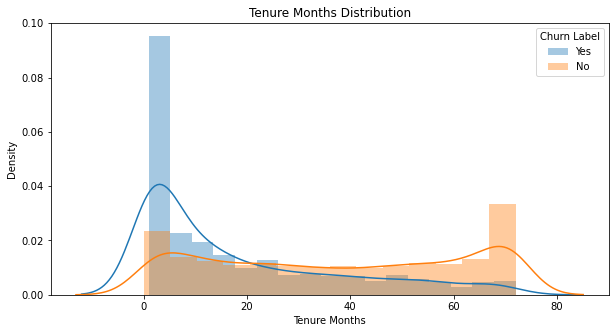

In [12]:
plt.figure(figsize=(10,5))
plt.title('Tenure Months Distribution')
sns.distplot(df[df['Churn Label'] == 'Yes']['Tenure Months'], label='Yes')
sns.distplot(df[df['Churn Label'] == 'No']['Tenure Months'], label='No')
plt.legend(title='Churn Label',loc= 'upper right')
plt.show()

D:\decipher_invoice\ana\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\decipher_invoice\ana\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


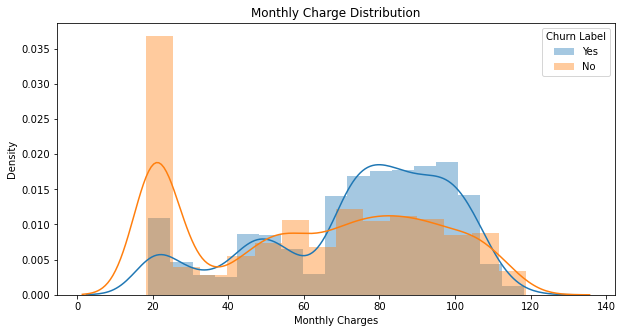

In [13]:
plt.figure(figsize=(10,5))
plt.title('Monthly Charge Distribution')
sns.distplot(df[df['Churn Label'] == 'Yes']['Monthly Charges'], label='Yes')
sns.distplot(df[df['Churn Label'] == 'No']['Monthly Charges'], label='No')
plt.legend(title='Churn Label',loc= 'upper right')
plt.show()

**Inference**:
- The shorter a customer uses the telco, the probability of churn increase.From here, actions can be taken for telco.
- As we can see from Monthly Charge Distiribution,the churn rate of customers with monthly average transactions higher than $70 is increasing.

#### 4.5 Analysis of features: phone service, multiple lines, internet service,online security

D:\decipher_invoice\ana\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\decipher_invoice\ana\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\decipher_invoice\ana\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\decipher_invoice\ana\lib\site-pack

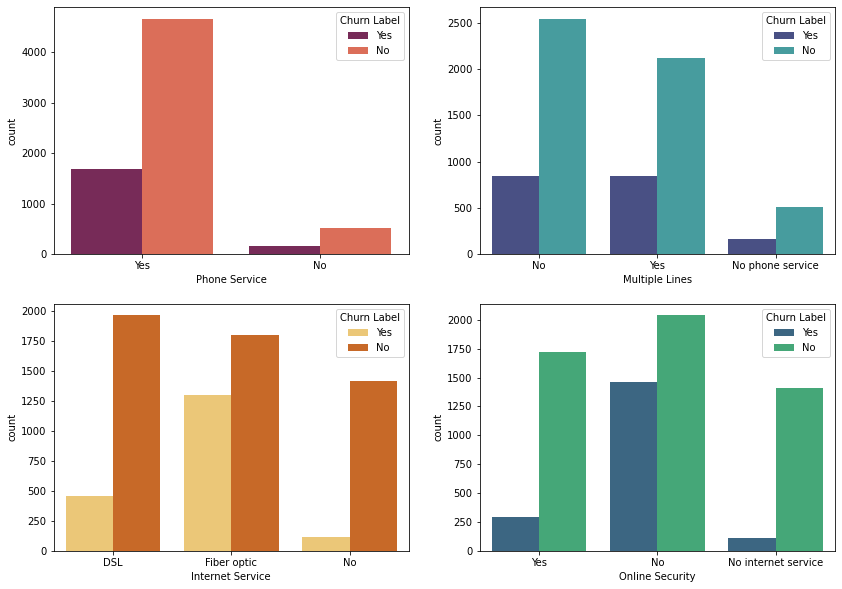

In [14]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.countplot('Phone Service',hue='Churn Label',data=df,palette='rocket',ax=ax[0,0])
sns.countplot('Multiple Lines',hue='Churn Label',data=df,palette='mako',ax=ax[0,1])
sns.countplot('Internet Service',hue='Churn Label',data=df,palette='YlOrBr',ax=ax[1,0])
sns.countplot('Online Security',hue='Churn Label',data=df,palette='viridis',ax=ax[1,1])

plt.show()

**Inference**:
- Majority of people who are using Phone service are happy and thus not churning
- Customers who have online security are not churning 

#### 4.5 Analysis of features: Online backup,device protection,tech support, contract

D:\decipher_invoice\ana\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\decipher_invoice\ana\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\decipher_invoice\ana\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\decipher_invoice\ana\lib\site-pack

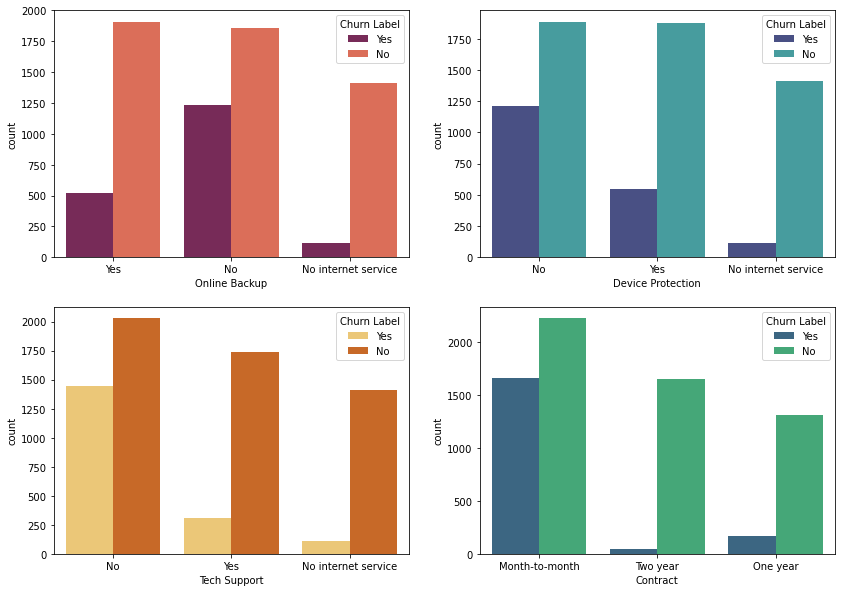

In [15]:
fig, ax =plt.subplots(nrows=2,ncols=2,figsize=(14,10))
sns.countplot('Online Backup',hue='Churn Label',data=df,palette='rocket',ax=ax[0,0])
sns.countplot('Device Protection',hue='Churn Label',data=df,palette='mako',ax=ax[0,1])
sns.countplot('Tech Support',hue='Churn Label',data=df,palette='YlOrBr',ax=ax[1,0])
sns.countplot('Contract',hue='Churn Label',data=df,palette='viridis',ax=ax[1,1])
plt.show()

**Inference**:
- Customers who have online backup are less likely to churn
- Customers who have 1 year/2 year contracts are less likely to churn compared to month-to-month customers    

#### 4.6 Top cities in which cutomers churn versus top cities in which customers dont churn

D:\decipher_invoice\ana\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\decipher_invoice\ana\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.
No handles with labels found to put in legend.


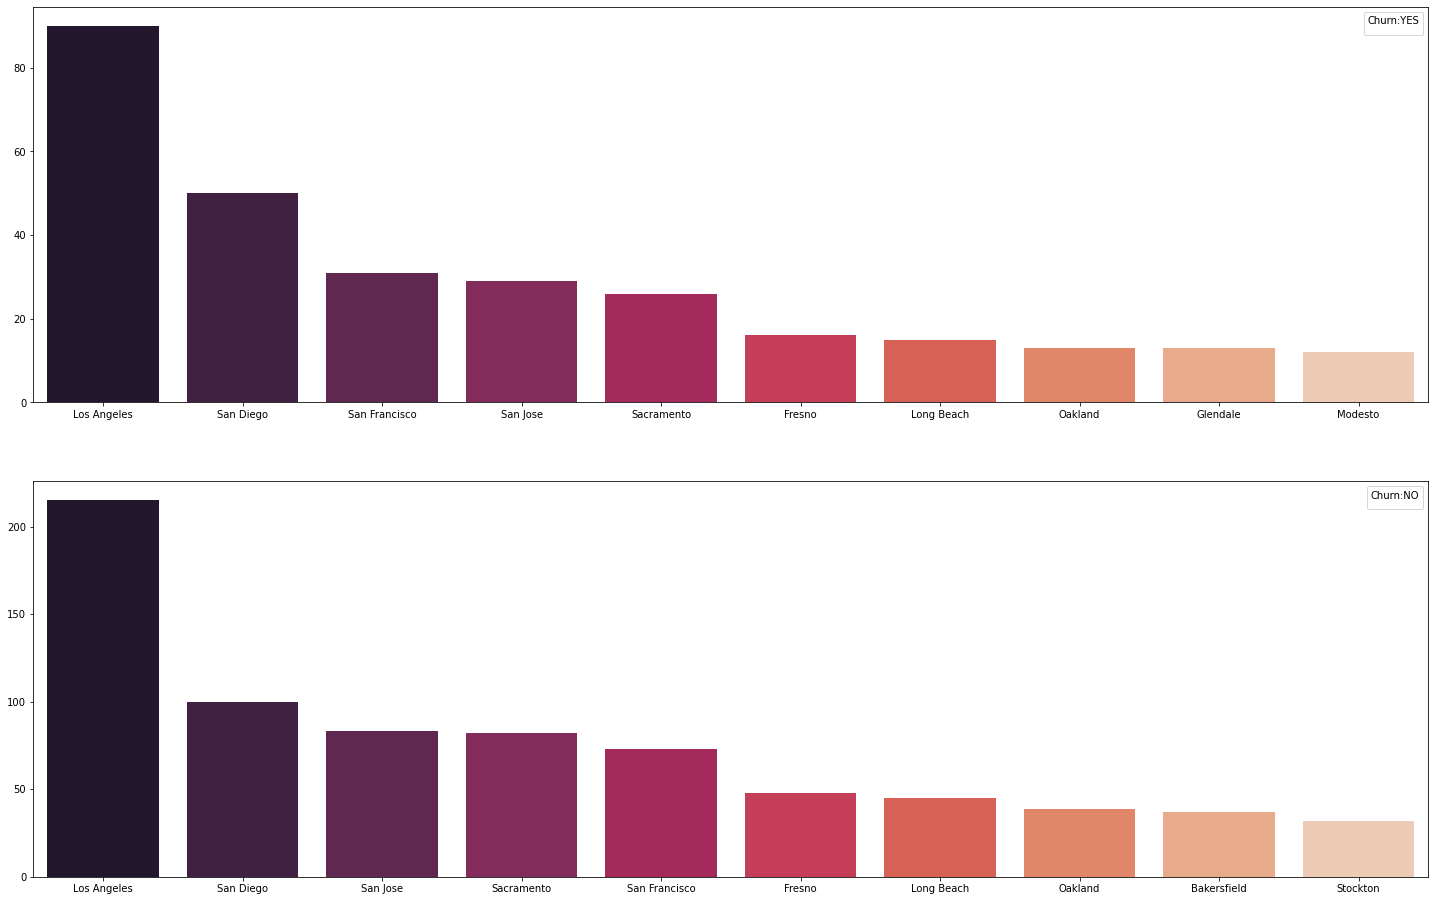

In [16]:
data=df[df['Churn Label'] == 'Yes']['City'].value_counts().nlargest(10)
data1=df[df['Churn Label'] == 'No']['City'].value_counts().nlargest(10)
fig, ax =plt.subplots(nrows=2,ncols=1,figsize=(25,16))
sns.barplot(data.index,data.values,palette='rocket',ax=ax[0])
sns.barplot(data1.index,data1.values,palette='rocket',ax=ax[1])
ax[0].legend(title='Churn:YES',loc='upper right') 
ax[1].legend(title='Churn:NO',loc='upper right')
plt.show()

#### Model

In [54]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [55]:
df.loc[(df['Streaming Movies'] == 'Yes')&(df['Streaming TV'] == 'Yes'),'Entertainment'] = 2
df.loc[(df['Streaming Movies'] == 'No internet service')&(df['Streaming TV'] == 'No internet service'),'Entertainment'] = 0
df['Entertainment'].fillna(1,inplace=True)

In [56]:
data_ml = df.drop(['Zip Code','Streaming TV', 'Streaming Movies','Churn Label','Churn Score', 'CLTV', 'Churn Reason'],axis=1)

In [57]:
data_ml.columns

Index(['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Value', 'Entertainment'],
      dtype='object')

In [58]:
label_encoded_columns=['Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Contract','Payment Method','Entertainment',
 'Gender','Senior Citizen','Partner','Dependents','Phone Service','Paperless Billing']

In [59]:
le=LabelEncoder()
for i in label_encoded_columns:
    data_ml[i]=le.fit_transform(data_ml[i])

In [83]:
fe=data_ml.groupby('City').size()/len(data_ml)
data_ml.loc[:,'City_freq_encode']=df['City'].map(fe)

In [84]:
data_ml

,City,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Entertainment,City_freq_encode
0,Los Angeles,1,0,0,0,2,1,0,0,2,...,0,0,0,1,3,53.85,108.15,1,1,0.043305
1,Los Angeles,0,0,0,1,2,1,0,1,0,...,0,0,0,1,2,70.70,151.65,1,1,0.043305
2,Los Angeles,0,0,0,1,8,1,2,1,0,...,2,0,0,1,2,99.65,820.50,1,2,0.043305
3,Los Angeles,0,0,1,1,28,1,2,1,0,...,2,2,0,1,2,104.80,3046.05,1,2,0.043305
4,Los Angeles,1,0,0,1,49,1,2,1,0,...,2,0,0,1,0,103.70,5036.30,1,2,0.043305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Landers,0,0,0,0,72,1,0,2,1,...,1,1,2,1,0,21.15,1419.40,0,0,0.000710
7039,Adelanto,1,0,1,1,24,1,2,0,2,...,2,2,1,1,3,84.80,1990.50,0,2,0.000710
7040,Amboy,0,0,1,1,72,1,2,1,0,...,2,0,1,1,1,103.20,7362.90,0,2,0.000710
7041,Angelus Oaks,0,0,1,1,11,0,1,0,2,...,0,0,0,1,2,29.60,346.45,0,1,0.000710


In [88]:
X = data_ml.drop(['Churn Value','City'],axis=1)
y = data_ml['Churn Value']

In [89]:
X.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Entertainment', 'City_freq_encode'],
      dtype='object')

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,stratify=y, random_state = 42)

exp1

In [31]:
parameters = {
    'max_depth': range (2, 5, 1),
    'n_estimators': range(50, 560, 100),
    'min_samples_split': [2,3,5],
    'min_samples_leaf':[1,3,5]
}

nb = RandomForestClassifier(class_weight="balanced")

#results = pd.DataFrame.from_dict(clf.cv_results_)


clf = GridSearchCV(nb, parameters, cv=3, scoring='roc_auc',n_jobs=8,verbose=2)
clf.fit(X_train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['mean_test_score'])

results.tail()

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   13.4s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:   31.9s
[Parallel(n_jobs=8)]: Done 486 out of 486 | elapsed:   46.1s finished
D:\decipher_invoice\ana\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\decipher_invoice\ana\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\decipher_invoice\ana\lib\site-packages\sk

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
129,0.840828,0.015439,0.068783,0.002497,4,3,2,350,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.864903,0.858928,0.839056,0.854298,0.011048,5,0.863019,0.865192,0.874350,0.867520,0.004910
136,1.002277,0.031492,0.074066,0.008688,4,3,3,450,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.864967,0.858952,0.839161,0.854362,0.011024,4,0.863062,0.865744,0.874309,0.867705,0.004796
134,0.581226,0.015313,0.048066,0.003512,4,3,3,250,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.864100,0.859696,0.839386,0.854396,0.010763,3,0.863551,0.865728,0.872898,0.867392,0.003993
147,0.737147,0.058313,0.053927,0.010138,4,5,2,350,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.865183,0.859463,0.838966,0.854539,0.011255,2,0.863428,0.865511,0.873574,0.867504,0.004376
133,0.338567,0.005875,0.026608,0.003544,4,3,3,150,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.865077,0.859094,0.840078,0.854752,0.010658,1,0.863335,0.865555,0.874393,0.867761,0.004776


In [32]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.1s finished


building tree 1 of 150building tree 2 of 150
building tree 3 of 150
building tree 4 of 150
building tree 5 of 150building tree 6 of 150
building tree 7 of 150


building tree 8 of 150
building tree 9 of 150
building tree 10 of 150
building tree 11 of 150building tree 12 of 150building tree 13 of 150building tree 14 of 150



building tree 15 of 150
building tree 16 of 150
building tree 17 of 150
building tree 18 of 150
building tree 19 of 150building tree 20 of 150building tree 21 of 150
building tree 22 of 150


building tree 23 of 150
building tree 24 of 150
building tree 25 of 150building tree 26 of 150

building tree 27 of 150building tree 28 of 150

building tree 29 of 150building tree 30 of 150

building tree 31 of 150
building tree 32 of 150
building tree 33 of 150
building tree 34 of 150building tree 35 of 150

building tree 36 of 150building tree 37 of 150

building tree 38 of 150building tree 39 of 150

building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


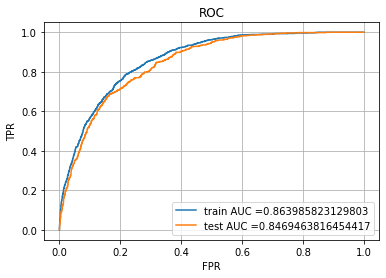

In [37]:
from sklearn.metrics import roc_curve, auc
nb = RandomForestClassifier(class_weight="balanced",max_depth=4,min_samples_split=3,min_samples_leaf=3,n_estimators=150,verbose=5,n_jobs=8)


nb.fit(X_train, y_train)



y_train_pred = (nb.predict_proba(X_train)[:,1])  

y_test_pred = (nb.predict_proba(X_test)[:,1])



train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)

test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.grid()
plt.show()

exp2

In [92]:
parameters = {
    'max_depth': range (2, 5, 1),
    'n_estimators': range(50, 560, 100),
    'min_samples_split': [2,3,5],
    'min_samples_leaf':[1,3,5]
}

nb = RandomForestClassifier(class_weight="balanced")

#results = pd.DataFrame.from_dict(clf.cv_results_)


clf = GridSearchCV(nb, parameters, cv=3, scoring='roc_auc',n_jobs=8,verbose=2)
clf.fit(X_train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['mean_test_score'])

results.tail()

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:   13.6s
[Parallel(n_jobs=8)]: Done 349 tasks      | elapsed:   32.6s
[Parallel(n_jobs=8)]: Done 486 out of 486 | elapsed:   46.4s finished
D:\decipher_invoice\ana\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\decipher_invoice\ana\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
D:\decipher_invoice\ana\lib\site-packages\sk

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
147,0.739159,0.044738,0.064042,0.009425,4,5,2,350,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.864793,0.858920,0.838420,0.854046,0.011305,5,0.863458,0.865632,0.873863,0.867651,0.004481
132,0.102120,0.011444,0.009373,0.006648,4,3,3,50,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.863339,0.860017,0.838899,0.854087,0.010823,4,0.862062,0.866632,0.872902,0.867198,0.004444
133,0.308896,0.017922,0.027619,0.003815,4,3,3,150,"{'max_depth': 4, 'min_samples_leaf': 3, 'min_s...",0.865884,0.859580,0.837072,0.854181,0.012367,3,0.864737,0.866492,0.873491,0.868240,0.003781
156,0.100867,0.008351,0.010081,0.000008,4,5,5,50,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.864725,0.858633,0.839196,0.854187,0.010887,2,0.861495,0.865714,0.872478,0.866562,0.004524
146,0.513068,0.048848,0.043076,0.005320,4,5,2,250,"{'max_depth': 4, 'min_samples_leaf': 5, 'min_s...",0.865048,0.859195,0.838812,0.854354,0.011245,1,0.863482,0.866205,0.873410,0.867699,0.004188


In [93]:
clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=250, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s


building tree 1 of 250
building tree 2 of 250
building tree 3 of 250
building tree 4 of 250
building tree 5 of 250
building tree 6 of 250
building tree 7 of 250
building tree 8 of 250
building tree 9 of 250building tree 10 of 250building tree 11 of 250building tree 12 of 250



building tree 13 of 250
building tree 14 of 250
building tree 15 of 250
building tree 16 of 250
building tree 17 of 250
building tree 18 of 250
building tree 19 of 250
building tree 20 of 250
building tree 21 of 250
building tree 22 of 250
building tree 23 of 250
building tree 24 of 250
building tree 25 of 250
building tree 26 of 250
building tree 27 of 250building tree 28 of 250
building tree 29 of 250

building tree 30 of 250
building tree 31 of 250
building tree 32 of 250
building tree 33 of 250
building tree 34 of 250
building tree 35 of 250building tree 36 of 250
building tree 37 of 250

building tree 38 of 250
building tree 39 of 250
building tree 40 of 250
building tree 41 of 250
building tree 42 of 250
b

[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s


building tree 173 of 250building tree 174 of 250building tree 175 of 250


building tree 176 of 250
building tree 177 of 250
building tree 178 of 250
building tree 179 of 250
building tree 180 of 250
building tree 181 of 250
building tree 182 of 250building tree 183 of 250

building tree 184 of 250
building tree 185 of 250
building tree 186 of 250
building tree 187 of 250building tree 188 of 250

building tree 189 of 250
building tree 190 of 250
building tree 191 of 250
building tree 192 of 250
building tree 193 of 250
building tree 194 of 250building tree 195 of 250

building tree 196 of 250
building tree 197 of 250
building tree 198 of 250
building tree 199 of 250
building tree 200 of 250
building tree 201 of 250
building tree 202 of 250
building tree 203 of 250building tree 204 of 250

building tree 205 of 250
building tree 206 of 250
building tree 207 of 250
building tree 208 of 250building tree 209 of 250building tree 210 of 250


building tree 211 of 250building tree 212 of 250



[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished


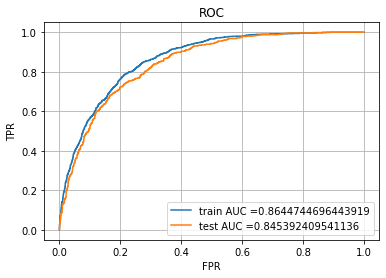

In [97]:
from sklearn.metrics import roc_curve, auc
nb = RandomForestClassifier(class_weight="balanced",max_depth=4,min_samples_split=2,min_samples_leaf=5,n_estimators=250,verbose=5,n_jobs=8)


nb.fit(X_train, y_train)



y_train_pred = (nb.predict_proba(X_train)[:,1])  

y_test_pred = (nb.predict_proba(X_test)[:,1])



train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)

test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.grid()
plt.show()

In [98]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, nb.predict_proba(X_test)[:, 1])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished


0.845392409541136

In [99]:
roc_auc_score(y_train, nb.predict_proba(X_train)[:, 1])

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished


0.8644744696443919